<a href="https://colab.research.google.com/github/inaafina/ArrhythmiaFinalProjectAI/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project - Team AI Lop IF**

**Model selection, Decision Tree, kNN, Naïve Bayes**



Dataset: https://archive.ics.uci.edu/ml/datasets/Arrhythmia

---





# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading Dataset

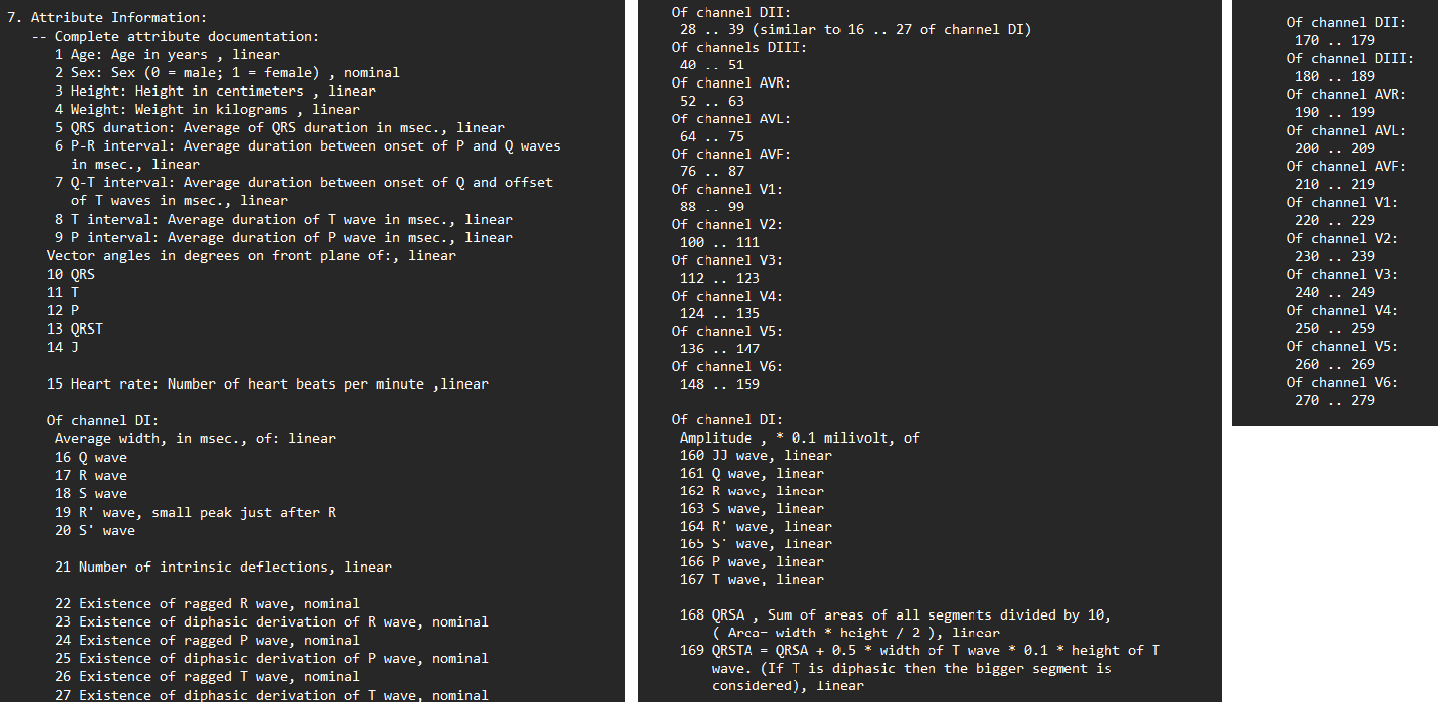

In [2]:
df = pd.read_csv('data_arrhythmia.csv')

In [3]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


# Data Pre-processing

## Checking the null value of each attributes 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [5]:
df.replace("?", np.nan, inplace=True)

In [6]:
# Convert all columns to numeric data type
df = df.apply(pd.to_numeric, errors='coerce')

# Verify the data type conversion
print(df.dtypes)

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object


In [7]:
null_counts = df.isnull().sum()
print("Null value counts per column:")

for column, count in null_counts.items():
  print(f"{column}: {count}")

Null value counts per column:
age: 0
sex: 0
height: 0
weight: 0
qrs_duration: 0
p-r_interval: 0
q-t_interval: 0
t_interval: 0
p_interval: 0
qrs: 0
T: 8
P: 22
QRST: 1
J: 376
heart_rate: 1
q_wave: 0
r_wave: 0
s_wave: 0
R'_wave: 0
S'_wave: 0
AA: 0
AB: 0
AC: 0
AD: 0
AE: 0
AF: 0
AG: 0
AH: 0
AI: 0
AJ: 0
AK: 0
AL: 0
AM: 0
AN: 0
AO: 0
AP: 0
AR: 0
AS: 0
AT: 0
AU: 0
AV: 0
AY: 0
AZ: 0
AB': 0
BB: 0
BC: 0
BD: 0
BE: 0
BF: 0
BG: 0
BH: 0
BI: 0
BJ: 0
BK: 0
BL: 0
BM: 0
BN: 0
BO: 0
BP: 0
BR: 0
BS: 0
BT: 0
BU: 0
BV: 0
BY: 0
BZ: 0
CA: 0
CB: 0
CC: 0
CD: 0
CE: 0
Cf: 0
CG: 0
CH: 0
CI: 0
CJ: 0
CK: 0
CL: 0
CM: 0
CN: 0
CO: 0
CP: 0
CR: 0
CS: 0
CT: 0
CU: 0
CV: 0
CY: 0
CZ: 0
DA: 0
DB: 0
DC: 0
DD: 0
DE: 0
DF: 0
DG: 0
DH: 0
DI: 0
DJ: 0
DK: 0
DL: 0
DM: 0
DN: 0
DO: 0
DP: 0
DR: 0
DS: 0
DT: 0
DU: 0
DV: 0
DY: 0
DZ: 0
EA: 0
EB: 0
EC: 0
ED: 0
EF: 0
EG: 0
EH: 0
EI: 0
EJ: 0
EK: 0
EL: 0
EM: 0
EN: 0
EO: 0
EP: 0
ER: 0
ES: 0
ET: 0
EU: 0
EV: 0
EY: 0
EZ: 0
FA: 0
FB: 0
FC: 0
FD: 0
FE: 0
FF: 0
FG: 0
FH: 0
FI: 0
FJ: 0
FK: 0
FL: 0
FM: 

## Mean Imputation

The attributes with Null Value found is this: 
* T: 8
* P: 22
* QRST: 1
* J: 376
* heart_rate: 1

Here we going to replace the Null value, using Mean Imputation



In [8]:
column_mean_11 = df['T'].mean()
column_mean_12 = df['P'].mean()
column_mean_13 = df['QRST'].mean()
column_mean_14 = df['J'].mean()
column_mean_15 = df['heart_rate'].mean()
print("Mean of the column T:", column_mean_11)
print("Mean of the column P:", column_mean_12)
print("Mean of the column QRST:", column_mean_13)
print("Mean of the column J:", column_mean_14)
print("Mean of the column heart_rate:", column_mean_15)

Mean of the column T: 36.1509009009009
Mean of the column P: 48.913953488372094
Mean of the column QRST: 36.71618625277162
Mean of the column J: -13.592105263157896
Mean of the column heart_rate: 74.46341463414635


In [9]:
# Replace NaN values with the mean
df['T'].fillna(column_mean_11, inplace=True)
df['P'].fillna(column_mean_12, inplace=True)
df['QRST'].fillna(column_mean_13, inplace=True)
df['J'].fillna(column_mean_14, inplace=True)
df['heart_rate'].fillna(column_mean_15, inplace=True)

In [10]:
null_counts = df.isnull().sum()
print("Null value counts per column:")

for column, count in null_counts.items():
  print(f"{column}: {count}")

Null value counts per column:
age: 0
sex: 0
height: 0
weight: 0
qrs_duration: 0
p-r_interval: 0
q-t_interval: 0
t_interval: 0
p_interval: 0
qrs: 0
T: 0
P: 0
QRST: 0
J: 0
heart_rate: 0
q_wave: 0
r_wave: 0
s_wave: 0
R'_wave: 0
S'_wave: 0
AA: 0
AB: 0
AC: 0
AD: 0
AE: 0
AF: 0
AG: 0
AH: 0
AI: 0
AJ: 0
AK: 0
AL: 0
AM: 0
AN: 0
AO: 0
AP: 0
AR: 0
AS: 0
AT: 0
AU: 0
AV: 0
AY: 0
AZ: 0
AB': 0
BB: 0
BC: 0
BD: 0
BE: 0
BF: 0
BG: 0
BH: 0
BI: 0
BJ: 0
BK: 0
BL: 0
BM: 0
BN: 0
BO: 0
BP: 0
BR: 0
BS: 0
BT: 0
BU: 0
BV: 0
BY: 0
BZ: 0
CA: 0
CB: 0
CC: 0
CD: 0
CE: 0
Cf: 0
CG: 0
CH: 0
CI: 0
CJ: 0
CK: 0
CL: 0
CM: 0
CN: 0
CO: 0
CP: 0
CR: 0
CS: 0
CT: 0
CU: 0
CV: 0
CY: 0
CZ: 0
DA: 0
DB: 0
DC: 0
DD: 0
DE: 0
DF: 0
DG: 0
DH: 0
DI: 0
DJ: 0
DK: 0
DL: 0
DM: 0
DN: 0
DO: 0
DP: 0
DR: 0
DS: 0
DT: 0
DU: 0
DV: 0
DY: 0
DZ: 0
EA: 0
EB: 0
EC: 0
ED: 0
EF: 0
EG: 0
EH: 0
EI: 0
EJ: 0
EK: 0
EL: 0
EM: 0
EN: 0
EO: 0
EP: 0
ER: 0
ES: 0
ET: 0
EU: 0
EV: 0
EY: 0
EZ: 0
FA: 0
FB: 0
FC: 0
FD: 0
FE: 0
FF: 0
FG: 0
FH: 0
FI: 0
FJ: 0
FK: 0
FL: 0
FM: 0
F

## Standardization

Column data that won't be standarized because it's categorical:
* Sex: Sex (0 = male; 1 = female) , nominal
* Existence of ragged R wave, nominal
* Existence of diphasic derivation of R wave, nominal
* Existence of ragged P wave, nominal
* Existence of diphasic derivation of P wave, nominal
* Existence of ragged T wave, nominal
* Existence of diphasic derivation of T wave, nominal


## Checking and Dropping Outliers

## [EXTRA] Scatter plot 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


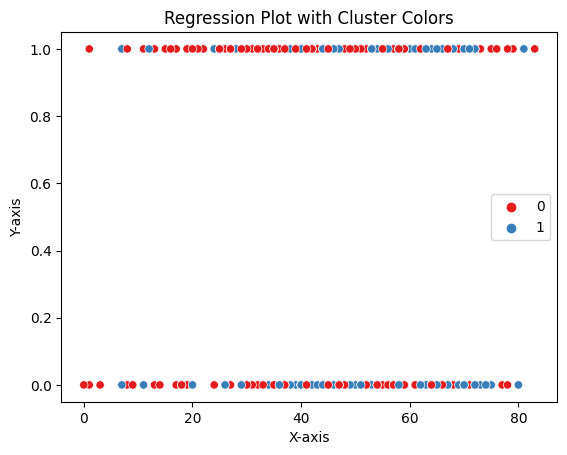

In [11]:
import seaborn as sns
from sklearn.cluster import KMeans

# Select the columns you want to use for clustering
X = df.iloc[:, :]  # Replace with your desired columns

# Initialize the KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=2)  # Replace 2 with your desired number of clusters

# Fit the data to the KMeans model
kmeans.fit(X)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Create a scatter plot with different colors for each cluster using Seaborn
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue=labels, palette='Set1')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Regression Plot with Cluster Colors')

# Display the plot
plt.show()

## [EXTRA] Scatter plot  Calculating the mean and standard deviation

In [12]:
df = (df - df.mean())/df.std()
print(df)

          age       sex    height    weight  qrs_duration  p-r_interval  \
0    1.732520 -1.106294  0.640617  0.713024      0.135355      0.844010   
1    0.578671  0.901919 -0.031962 -0.251365     -0.515501      0.420303   
2    0.457213 -1.106294  0.156360  1.617140      3.194376      0.174999   
3    0.517942 -1.106294  0.237069  1.556865      0.721125      1.044714   
4    1.732520 -1.106294  0.640617  0.713024     -0.059902      0.576406   
..        ...       ...       ...       ...           ...           ...   
447  0.396484  0.901919 -0.166478  0.110281     -0.580586      0.977813   
448 -0.575178 -1.106294  0.640617  1.014396      0.721125     -0.404811   
449 -0.635907 -1.106294 -0.005059 -0.010268      1.241809      0.464904   
450 -0.878822  0.901919 -0.300994 -0.793835      0.265526     -1.096123   
451  1.914706  0.901919 -0.166478  0.110281     -0.645672     -0.627815   

     q-t_interval  t_interval  p_interval       qrs  ...        KY        KZ  \
0        0.113584  

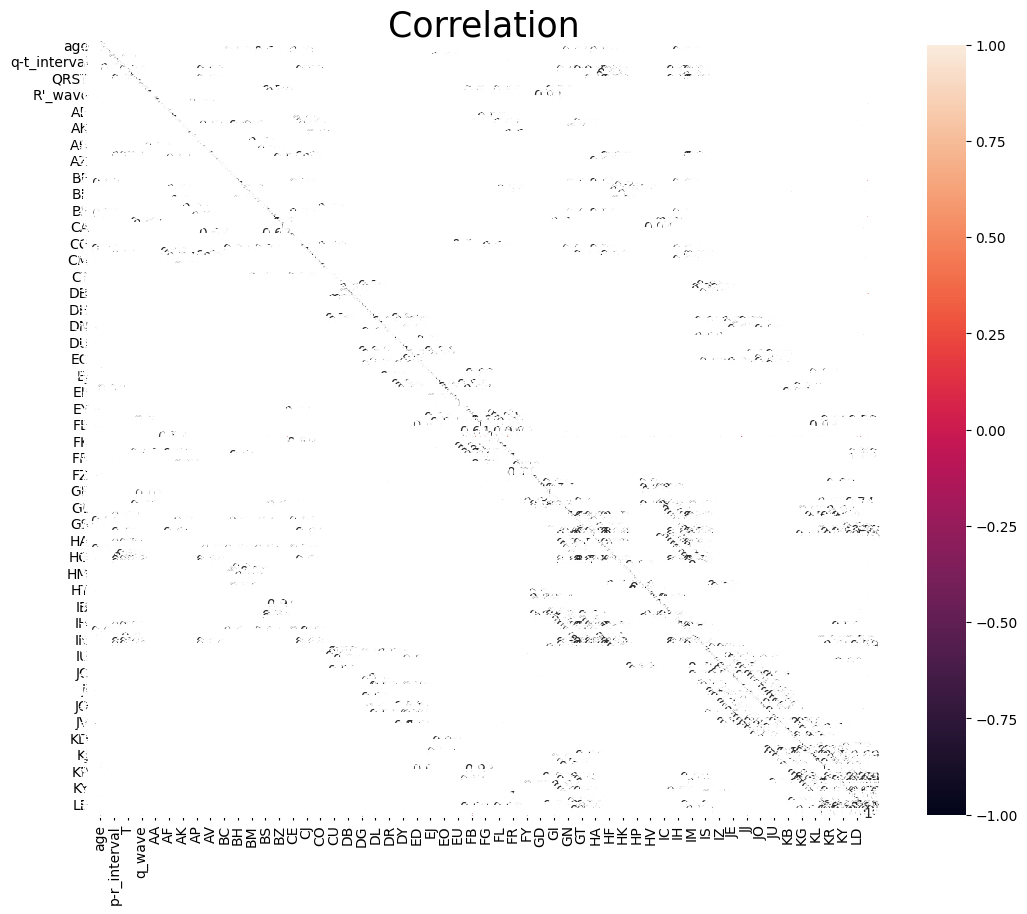

In [14]:
corr= df.corr()

plt.figure(figsize=(15,10))

plt.title('Correlation', y=1, size=25)

sns.heatmap(corr, annot= True, linewidths= .5, square=True)

plt.show()

# Data Exploration

## Splitting Data 

## KNN

## Naive Byes

# **Reference**

https://stackoverflow.com/questions/62435218/how-to-read-the-dataset-data-and-names-directly-into-python-dataframe-from-u

https://stackoverflow.com/questions/71479659/dataframes-from-data-names-and-test-files-using-pandas

https://towardsdatascience.com/different-imputation-methods-to-handle-missing-data-8dd5bce97583

https://towardsdatascience.com/normalization-vs-standardization-which-one-is-better-f29e043a57eb#:~:text=If%20you%20see%20a%20bell,values%20into%20a%20small%20range.

https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb

https://www.kaggle.com/code/havinath/eda-visualizations-predictions

